# Importing Libraries

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Importing the data

In [108]:
path = os.path.join(os.getcwd(), 'DataScienceCleanStatement.csv')
file = pd.read_csv(path)
file.head()

,Date,Description,InternationTransactionAmount,Category,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country,Unnamed: 12
0,12/12/2019,THE ROOM GURGAON ...,0,Video game,-127,VIBHORE GOYAL,Domestic,INR,Central Park II,Gurugram,Haryana,India,NaN
1,12/12/2019,CUT AND STYLEGURGAON ...,0,Occupation,-499,JASJIT KAUR,Domestic,INR,Sector 4,Gurugram,Haryana,India,NaN
2,12/12/2019,MUMUSOGURGAON ...,0,,-388,JASJIT KAUR,Domestic,INR,Sector 49,Gurugram,Haryana,India,NaN
3,12/12/2019,THE ROOM GURGAON ...,0,Video game,-108,VIBHORE GOYAL,Domestic,INR,Central Park II,Gurugram,Haryana,India,NaN
4,12/12/2019,THE ROOM GURGAON ...,0,Video game,-50,VIBHORE GOYAL,Domestic,INR,Central Park II,Gurugram,Haryana,India,NaN


In [109]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   Date                                                                 1470 non-null   object
 1   Description                                                          1470 non-null   object
 2   InternationTransactionAmount                                         1470 non-null   object
 3     Category                                                           1470 non-null   object
 4     Amount                                                             1470 non-null   object
 5   TransactionUserName                                                  1470 non-null   object
 6    TransactionType                                                     1470 non-null   object
 7   IsoCurrency    

In [110]:
# cols = list(file.columns)

# Removing the Spaces in before and after the Column name

In [111]:
cols = dict([(x,x.strip()) for x in list(file.columns)])
file.rename(columns = cols, inplace=True)

In [112]:
file.head()

,Date,Description,InternationTransactionAmount,Category,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country,Unnamed: 12
0,12/12/2019,THE ROOM GURGAON ...,0,Video game,-127,VIBHORE GOYAL,Domestic,INR,Central Park II,Gurugram,Haryana,India,NaN
1,12/12/2019,CUT AND STYLEGURGAON ...,0,Occupation,-499,JASJIT KAUR,Domestic,INR,Sector 4,Gurugram,Haryana,India,NaN
2,12/12/2019,MUMUSOGURGAON ...,0,,-388,JASJIT KAUR,Domestic,INR,Sector 49,Gurugram,Haryana,India,NaN
3,12/12/2019,THE ROOM GURGAON ...,0,Video game,-108,VIBHORE GOYAL,Domestic,INR,Central Park II,Gurugram,Haryana,India,NaN
4,12/12/2019,THE ROOM GURGAON ...,0,Video game,-50,VIBHORE GOYAL,Domestic,INR,Central Park II,Gurugram,Haryana,India,NaN


# Cleaning the Country Column

In [113]:
l = file['Country'].value_counts().index
l

Index(['India', 'Singapore', 'United States', 'Malaysia', 'Haryana',
       'Rajasthan', 'Delhi'],
      dtype='object')

In [114]:
filter1 = file['Country'] == 'Haryana'
filter2 = file['Country'] == 'Delhi'
filter3 = file['Country'] == 'Rajasthan'
file['Country'].where((~(filter1 | filter2 | filter3)), 'India', inplace = True )

In [115]:
file.Country.value_counts()

India            1264
Singapore          28
United States      12
Malaysia            3
Name: Country, dtype: int64

# Removing the un-nacessary column

In [116]:
file.drop(['Unnamed: 12'], axis = 1, inplace=True)

In [117]:
file.isna().sum()

Date                              0
Description                       0
InternationTransactionAmount      0
Category                          0
Amount                            0
TransactionUserName               0
TransactionType                   0
IsoCurrency                       0
Locality                        168
City                            200
State                           225
Country                         163
dtype: int64

# Defining the function to remove front and trailing spaces from column values

In [118]:
def space_remover(col):
    lst =[]
    for x in file[col]:
        lst.append(x.strip().upper())
    file[col] = lst
cols = file.columns
space_remover('InternationTransactionAmount')   # removing front and rear space from column values

# Cleaning InternationTransactionAmount column

In [119]:
file.iloc[182,2:8] = ['0','Food','-438.9','VIBHORE GOYAL','Domestic',np.nan]
file.iloc[477, 4:11] = ['-2899','JASJIT KAUR','DOMESTIC','INR','BLOCK S','GURUGRAM','HARYANA']
file.iloc[755, 4:11] = ['-2348','VIBHORE GOYAL','DOMESTIC','INR','D1 BLOCK','GURUGRAM',"HARYANA"]
file.iloc[789, 4:11] = ['-2391','VIBHORE GOYAL','DOMESTIC','INR','CIVIL LINES','JAIPUR','RAJASTHAN']

# Filling null Values

In [120]:
from sklearn.impute import SimpleImputer
missing_columns = file.iloc[:,:]
imputer = SimpleImputer(strategy='most_frequent')
cols_imputed = imputer.fit_transform(missing_columns)
file.iloc[:,:] = cols_imputed

In [121]:
file.isna().sum()

Date                            0
Description                     0
InternationTransactionAmount    0
Category                        0
Amount                          0
TransactionUserName             0
TransactionType                 0
IsoCurrency                     0
Locality                        0
City                            0
State                           0
Country                         0
dtype: int64

In [122]:
# Remove spaces before and after.
cols = file.columns
for column in cols:
    x = file[column]
    x = [y.strip().upper() for y in list(x)]
    file[column] = x

In [123]:
x = file['Description']
x = [' '.join(x[i].split()) for i in range (len(x))]
file['Description'] = x

# Cleaning and Proper orienting the data

In [124]:
# making city names separated in column
def city_separator(city_):

    x = list(file['Description'])
    city = city_.lower()

    for i in range(len(x)):
        v = x[i].casefold()

        if city in v:
            st = v.partition(city)
            var = []
            for k in st:
                
                if k != '':
                    var.append(k.strip())

            x[i]=' '.join(var).upper()
         
    file['Description'] = x

In [125]:
city_list = list(file['City'].value_counts().index)
city_list.pop(2)
city_list.extend(['GURGAON','LONDON','DELHI', 'JAIPUR'])     # gurgaon not in city
for i in city_list:
   city_separator(i)

In [126]:
file['Description']

0                      THE ROOM GURGAON
1                 CUT AND STYLE GURGAON
2                        MUMUSO GURGAON
3                      THE ROOM GURGAON
4                      THE ROOM GURGAON
                     ...               
1465    KFC SEC 47 SOHNA ROAD G GURGAON
1466           SPICEJET LIMITED GURGAON
1467           CAFE COFFEE DAYILD TRADE
1468          SHOPPERS STOP LTD GURGAON
1469         TATA INDICOM-DOCOMO MUMBAI
Name: Description, Length: 1470, dtype: object

# Converting numerical columns to float type from object type

In [127]:
file.columns

Index(['Date', 'Description', 'InternationTransactionAmount', 'Category',
       'Amount', 'TransactionUserName', 'TransactionType', 'IsoCurrency',
       'Locality', 'City', 'State', 'Country'],
      dtype='object')

In [128]:
file['InternationTransactionAmount'] = file['InternationTransactionAmount'].astype(np.float64)
file['Amount'] = file['Amount'].astype(np.float64)

In [129]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          1470 non-null   object 
 1   Description                   1470 non-null   object 
 2   InternationTransactionAmount  1470 non-null   float64
 3   Category                      1470 non-null   object 
 4   Amount                        1470 non-null   float64
 5   TransactionUserName           1470 non-null   object 
 6   TransactionType               1470 non-null   object 
 7   IsoCurrency                   1470 non-null   object 
 8   Locality                      1470 non-null   object 
 9   City                          1470 non-null   object 
 10  State                         1470 non-null   object 
 11  Country                       1470 non-null   object 
dtypes: float64(2), object(10)
memory usage: 137.9+ KB


# Saving the clean file 

In [130]:
# file.to_csv('Modified.csv')

# Selecting The Columns of Object type only

In [131]:
text_col = list(file.select_dtypes(include= 'object').columns)[1:]
text_col

['Description',
 'Category',
 'TransactionUserName',
 'TransactionType',
 'IsoCurrency',
 'Locality',
 'City',
 'State',
 'Country']

In [132]:
# converted_col = []
# col_unique = []
# for name in text_col:
#     var = name.lower()+'_converted'
#     uni = name.lower()+'_unique'
#     converted_col.append(var)
#     col_unique.append(uni)
#     vars()[var], vars()[uni] = pd.factorize(file[name])
#     # exec('var, uni = pd.factorize(file[name])')
#     # print(var,uni)

# descriptopn_converted, description_unique = pd.factorize(file['Description'])

In [133]:
file.head()

,Date,Description,InternationTransactionAmount,Category,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country
0,12/12/2019,THE ROOM GURGAON,0.0,VIDEO GAME,-127.0,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
1,12/12/2019,CUT AND STYLE GURGAON,0.0,OCCUPATION,-499.0,JASJIT KAUR,DOMESTIC,INR,SECTOR 4,GURUGRAM,HARYANA,INDIA
2,12/12/2019,MUMUSO GURGAON,0.0,,-388.0,JASJIT KAUR,DOMESTIC,INR,SECTOR 49,GURUGRAM,HARYANA,INDIA
3,12/12/2019,THE ROOM GURGAON,0.0,VIDEO GAME,-108.0,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
4,12/12/2019,THE ROOM GURGAON,0.0,VIDEO GAME,-50.0,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA


In [134]:
new_file = file.copy()

In [135]:
new_file.head()

,Date,Description,InternationTransactionAmount,Category,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country
0,12/12/2019,THE ROOM GURGAON,0.0,VIDEO GAME,-127.0,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
1,12/12/2019,CUT AND STYLE GURGAON,0.0,OCCUPATION,-499.0,JASJIT KAUR,DOMESTIC,INR,SECTOR 4,GURUGRAM,HARYANA,INDIA
2,12/12/2019,MUMUSO GURGAON,0.0,,-388.0,JASJIT KAUR,DOMESTIC,INR,SECTOR 49,GURUGRAM,HARYANA,INDIA
3,12/12/2019,THE ROOM GURGAON,0.0,VIDEO GAME,-108.0,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
4,12/12/2019,THE ROOM GURGAON,0.0,VIDEO GAME,-50.0,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA


In [136]:
new_file.drop(['Date','Category'], axis = 1, inplace=True)

In [137]:
new_file.head()

,Description,InternationTransactionAmount,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country
0,THE ROOM GURGAON,0.0,-127.0,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
1,CUT AND STYLE GURGAON,0.0,-499.0,JASJIT KAUR,DOMESTIC,INR,SECTOR 4,GURUGRAM,HARYANA,INDIA
2,MUMUSO GURGAON,0.0,-388.0,JASJIT KAUR,DOMESTIC,INR,SECTOR 49,GURUGRAM,HARYANA,INDIA
3,THE ROOM GURGAON,0.0,-108.0,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
4,THE ROOM GURGAON,0.0,-50.0,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA


In [138]:
city_unique = new_file['City'].value_counts().index
city_unique.sort_values()

Index(['ALEXANDRIA', 'ALWAR', 'AMRITSAR', 'ARPORA', 'BAMBOLIM', 'BENGALURU',
       'CHANDIGARH', 'DABOLIM', 'FARIDABAD', 'FATEHGARH SAHIB', 'GHATA',
       'GREATER NOIDA', 'GURDASPUR', 'GURUGRAM', 'HARYANA', 'HYDERABAD',
       'JAIPUR', 'KHANNA', 'KOLKATA', 'KOTA', 'KUALA LUMPUR', 'KUKAS',
       'LOS ANGELES', 'LUDHIANA', 'MANDI GOBINDGARH', 'MUMBAI', 'NEW DELHI',
       'NEW YORK', 'NOIDA', 'PAOTA', 'PATIALA', 'SAHIBZADA AJIT SINGH NAGAR',
       'SAN ANTONIO', 'SARHOL', 'SEATTLE', 'SEPANG', 'SINGAPORE', 'गुरुग्राम'],
      dtype='object')

In [139]:
new_file['State'].where(new_file['City'] != 'SINGAPORE', 'SINGAPORE', inplace=True)
new_file['State'].where(new_file['City'] != 'NEW DELHI', 'NEW DELHI`', inplace=True)

In [140]:
new_file

,Description,InternationTransactionAmount,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country
0,THE ROOM GURGAON,0.0,-127.0,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
1,CUT AND STYLE GURGAON,0.0,-499.0,JASJIT KAUR,DOMESTIC,INR,SECTOR 4,GURUGRAM,HARYANA,INDIA
2,MUMUSO GURGAON,0.0,-388.0,JASJIT KAUR,DOMESTIC,INR,SECTOR 49,GURUGRAM,HARYANA,INDIA
3,THE ROOM GURGAON,0.0,-108.0,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
4,THE ROOM GURGAON,0.0,-50.0,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
...,...,...,...,...,...,...,...,...,...,...
1465,KFC SEC 47 SOHNA ROAD G GURGAON,0.0,-120.0,VIBHORE GOYAL,DOMESTIC,INR,D1 BLOCK,GURUGRAM,HARYANA,INDIA
1466,SPICEJET LIMITED GURGAON,0.0,-1798.0,VIBHORE GOYAL,DOMESTIC,INR,PHASE III,GURUGRAM,HARYANA,INDIA
1467,CAFE COFFEE DAYILD TRADE,0.0,-298.0,VIBHORE GOYAL,DOMESTIC,INR,SOHNA ROAD,GURUGRAM,HARYANA,INDIA
1468,SHOPPERS STOP LTD GURGAON,0.0,-1852.0,JASJIT KAUR,DOMESTIC,INR,HERITAGE CITY,GURUGRAM,HARYANA,INDIA


In [141]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Applying the label encoder to categorical columns

In [142]:
new_file[new_file.select_dtypes(include=['object']).columns] = new_file[new_file.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [143]:
new_file.head()

,Description,InternationTransactionAmount,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country
0,401,0.0,-127.0,2,0,0,30,13,4,0
1,78,0.0,-499.0,1,0,0,143,13,4,0
2,267,0.0,-388.0,1,0,0,145,13,4,0
3,401,0.0,-108.0,2,0,0,30,13,4,0
4,401,0.0,-50.0,2,0,0,30,13,4,0


In [144]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Applying Minmax scaling to dataframe

In [145]:
new_file = pd.DataFrame(scaler.fit_transform(new_file), columns = new_file.columns)

In [146]:
new_file.head()

,Description,InternationTransactionAmount,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country
0,0.932558,0.0,0.154895,1.0,0.0,0.0,0.162162,0.351351,0.2,0.0
1,0.181395,0.0,0.154446,0.5,0.0,0.0,0.772973,0.351351,0.2,0.0
2,0.620930,0.0,0.154580,0.5,0.0,0.0,0.783784,0.351351,0.2,0.0
3,0.932558,0.0,0.154918,1.0,0.0,0.0,0.162162,0.351351,0.2,0.0
4,0.932558,0.0,0.154988,1.0,0.0,0.0,0.162162,0.351351,0.2,0.0


In [147]:
from sklearn.cluster import KMeans

In [148]:
k_means = KMeans(n_clusters=3, random_state= 42)

In [149]:
k_means.fit(new_file)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [150]:
import numpy as np
label = k_means.labels_
np.unique(label)

array([0, 1, 2])

In [173]:
n_classes = range(1,20)

k_means = [KMeans(n_clusters= i, random_state = 42) for i in n_classes]
score = [k_means[i].fit(new_file).score(new_file) for i in range(len(k_means))]

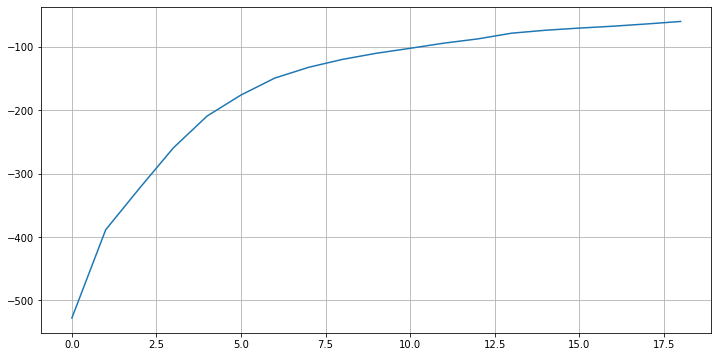

In [174]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
plt.plot(score)
plt.grid()
plt.show()

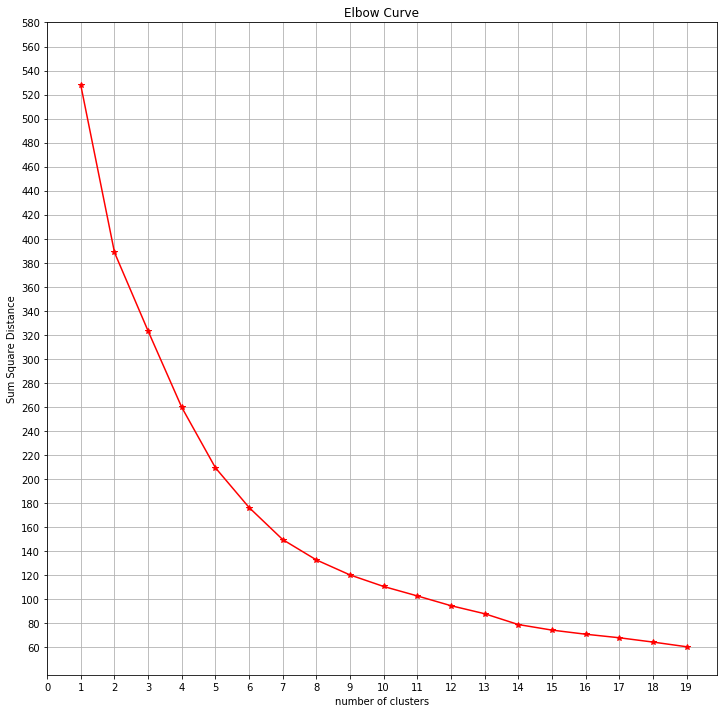

In [176]:
score = np.absolute(score)

plt.figure(figsize = (12,12))
plt.plot(n_classes, score, 'r', marker = "*")
plt.xlabel('number of clusters')
plt.ylabel('Sum Square Distance')
plt.title('Elbow Curve')
plt.yticks([x for x in range(60,600,20)])
plt.xticks([x for x in range(0,20)])
plt.grid()
plt.show()

In [177]:
kmeans = KMeans(n_clusters = 14, random_state = 42)
kmeans.fit(new_file)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=14, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [178]:
category = list(kmeans.labels_)

In [179]:
file['Category'] = category

In [180]:
file.head(30)

,Date,Description,InternationTransactionAmount,Category,Amount,TransactionUserName,TransactionType,IsoCurrency,Locality,City,State,Country
0,12/12/2019,THE ROOM GURGAON,0.0,13,-127.00,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
1,12/12/2019,CUT AND STYLE GURGAON,0.0,4,-499.00,JASJIT KAUR,DOMESTIC,INR,SECTOR 4,GURUGRAM,HARYANA,INDIA
2,12/12/2019,MUMUSO GURGAON,0.0,5,-388.00,JASJIT KAUR,DOMESTIC,INR,SECTOR 49,GURUGRAM,HARYANA,INDIA
3,12/12/2019,THE ROOM GURGAON,0.0,13,-108.00,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
4,12/12/2019,THE ROOM GURGAON,0.0,13,-50.00,VIBHORE GOYAL,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
5,13-12-2019,JAIPUR SPACEJAIPUR,0.0,5,-360.00,JASJIT KAUR,DOMESTIC,INR,SECTOR 9,JAIPUR,RAJASTHAN,INDIA
6,13-12-2019,CAFE COFFEE DAYHIGHWAY KI,0.0,8,-286.00,JASJIT KAUR,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
7,14-12-2019,CAFE COFFEE DAYALANKAR PL,0.0,8,-786.00,JASJIT KAUR,DOMESTIC,INR,CENTRAL PARK II,GURUGRAM,HARYANA,INDIA
8,15-12-2019,LIFE STYLE INTERNATIONA JAIPUR,0.0,0,-1698.00,VIBHORE GOYAL,DOMESTIC,INR,DURGADAS COLONY,JAIPUR,RAJASTHAN,INDIA
9,15-12-2019,NEW U 47 JAIPUR,0.0,0,-1890.00,VIBHORE GOYAL,DOMESTIC,INR,JAIPUR,JAIPUR,RAJASTHAN,INDIA


In [ ]:
clusters = kmeans.predict(new_file)